# Malmquist bias

## Identify the effects of cutting in magnitude near 5$\sigma$

In [1]:
import os, sys
import h5py
import numpy as np
import matplotlib.pyplot as plt   #plotting routines
from matplotlib.backends.backend_pdf import PdfPages
from utils import *

%matplotlib inline

In [2]:
test_filename              = 'PhotoZML/data/test_dc2_validation_9816.hdf5'   # relative path
train_filename             = 'PhotoZML/data/test_dc2_training_9816.hdf5' # relative path
testFile_absPath=os.path.realpath(os.path.normpath(os.path.join("./", test_filename)))
trainFile_absPath=os.path.realpath(os.path.normpath(os.path.join("./", train_filename)))

In [3]:
h5_file = load_raw_hdf5_data(testFile_absPath, groupname='photometry')
dataArray = group_entries(h5_file)
print(dataArray.shape)

(20449, 15)


In [4]:
gal_id, u_mag, u_err,\
        g_mag, g_err,\
        r_mag, r_err,\
        i_mag, i_err,\
        z_mag, z_err,\
        y_mag, y_err,\
        context, z = (col.ravel() for col in np.hsplit(dataArray, dataArray.shape[1]))
print(u_mag.shape, u_err.shape, u_mag[0:10])

(20449,) (20449,) [21.86380005 21.16619873 20.19165611 19.16210747 18.99630928 22.60641861
 20.77092171 24.33146858 23.9744854  23.61293983]


In [5]:
filtersPath = os.path.realpath('./LEPHARELSST/filt/lsst_baseline')
print(filtersPath)
filtersList = np.array( [ os.path.join(filtersPath, 'total_u.pb'),\
                           os.path.join(filtersPath, 'total_g.pb'),\
                           os.path.join(filtersPath, 'total_r.pb'),\
                           os.path.join(filtersPath, 'total_i.pb'),\
                           os.path.join(filtersPath, 'total_z.pb'),\
                           os.path.join(filtersPath, 'total_y.pb') ] )
print(filtersList.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARELSST/filt/lsst_baseline
(6,)


5-sigma depth is: 25.17890739440918 mag,
Cumulated visit duration is: 380.0428275019689 s


25.17890739440918

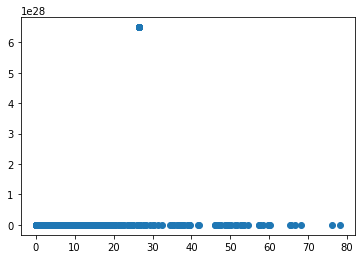

In [6]:
plt.scatter(u_err, sigma1(u_mag, 'u', find_m5(u_mag, u_err)))
find_m5(u_mag, u_err)

In [7]:
mag, snr = 31.8, 5

# Filter mag entries
indexes = filter_m5_entries(dataArray)
#print(indexes.shape)
data_f0=dataArray
data_f=np.delete(dataArray,indexes,axis=0)
data_f_removed=dataArray[indexes,:]

print("Filters: {} original, {} removed, {} left ({} total for check).".format(data_f0.shape,\
                                                                                          data_f_removed.shape,\
                                                                                          data_f.shape,\
                                                                                          data_f_removed.shape[0]+data_f.shape[0]))

Filters: (20449, 15) original, (12897, 15) removed, (7552, 15) left (20449 total for check).


In [8]:
gal_id_clean, u_mag_clean, u_err_clean,\
        g_mag_clean, g_err_clean,\
        r_mag_clean, r_err_clean,\
        i_mag_clean, i_err_clean,\
        z_mag_clean, z_err_clean,\
        y_mag_clean, y_err_clean,\
        context_clean, z_clean = (col.ravel() for col in np.hsplit(data_f, data_f.shape[1]))
print(u_mag_clean.shape, u_err_clean.shape, u_mag_clean[0:10])

(7552,) (7552,) [21.86380005 21.16619873 20.19165611 19.16210747 18.99630928 22.60641861
 20.77092171 24.33146858 23.9744854  23.61293983]


5-sigma depth is: 25.17890739440918 mag,
Cumulated visit duration is: 380.0428275019689 s


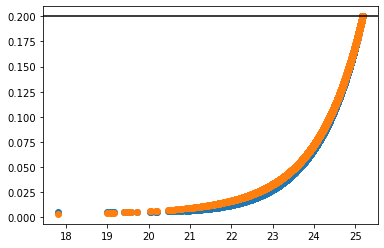

In [9]:
plt.scatter(u_mag_clean, u_err_clean)
plt.scatter(u_mag_clean, sigma1(u_mag_clean, 'u', m5=find_m5(u_mag, u_err)))
plt.axhline(0.2, color='k')
#plt.plot([np.min(u_err_clean), np.max(u_err_clean)], [np.min(u_err_clean), np.max(u_err_clean)], c='k')

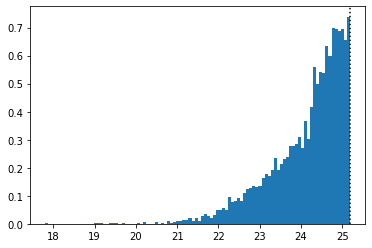

In [10]:
m5u = find_m5(u_mag, u_err)
m5g = find_m5(g_mag, g_err)
m5r = find_m5(r_mag, r_err)
m5i = find_m5(i_mag, i_err)
m5z = find_m5(z_mag, z_err)
m5y = find_m5(y_mag, y_err)

plt.hist(u_mag_clean, bins=100, density=True)
plt.axvline(m5u, c='k', ls=':')

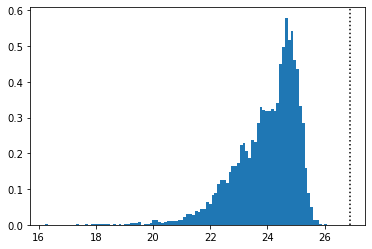

In [11]:
plt.hist(g_mag_clean, bins=100, density=True)
plt.axvline(m5g, c='k', ls=':')

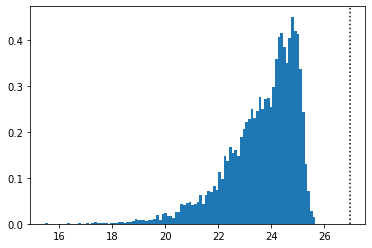

In [12]:
plt.hist(r_mag_clean, bins=100, density=True)
plt.axvline(m5r, c='k', ls=':')

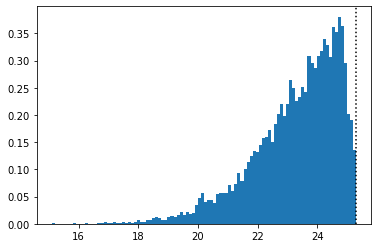

In [13]:
plt.hist(i_mag_clean, bins=100, density=True)
plt.axvline(m5i, c='k', ls=':')

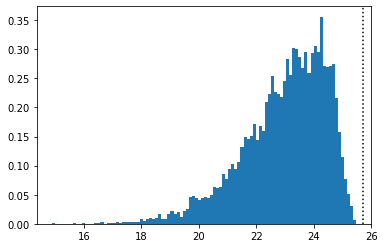

In [14]:
plt.hist(z_mag_clean, bins=100, density=True)
plt.axvline(m5z, c='k', ls=':')

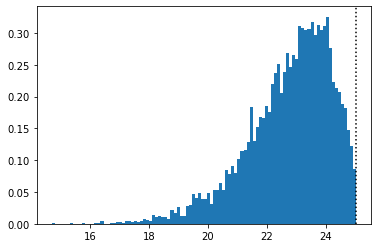

In [15]:
plt.hist(y_mag_clean, bins=100, density=True)
plt.axvline(m5y, c='k', ls=':')

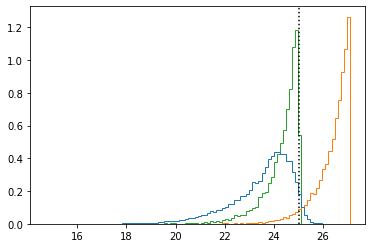

In [16]:
N=10000
ymag_prob=generate_magnitudes(N, m_min=np.min(y_mag), m_max=np.max(y_mag))
ymag_cut=generate_magnitudes(N, m_min=np.min(y_mag), m_max=m5y)
plt.hist((y_mag, ymag_prob, ymag_cut), bins=100, density=True, histtype='step', cumulative=False)
plt.axvline(m5y, c='k', ls=':')

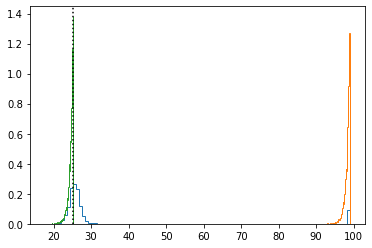

In [17]:
N=10000
umag_prob=generate_magnitudes(N, m_min=np.min(u_mag), m_max=np.max(u_mag))
umag_cut=generate_magnitudes(N, m_min=np.min(u_mag), m_max=m5u)
plt.hist(u_mag, bins=100, density=True, histtype='step', cumulative=False)
plt.hist(umag_prob, bins=100, density=True, histtype='step', cumulative=False)
plt.hist(umag_cut, bins=100, density=True, histtype='step', cumulative=False)
plt.axvline(m5u, c='k', ls=':')

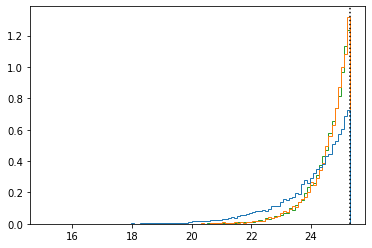

In [18]:
N=10000
imag_prob=generate_magnitudes(N, m_min=np.min(i_mag), m_max=np.max(i_mag))
imag_cut=generate_magnitudes(N, m_min=np.min(i_mag), m_max=m5i)
plt.hist((i_mag, imag_prob, imag_cut), bins=100, density=True, histtype='step', cumulative=False)
plt.axvline(m5i, c='k', ls=':')

In [19]:
sedPath_LePhare = os.path.realpath('./LEPHARE/sed/GAL/CWW_KINNEY')
print(sedPath_LePhare)
sedList_LePhare = np.array( [ os.path.join(sedPath_LePhare, 'CWW_E_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'CWW_Sbc_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'CWW_Scd_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'CWW_Im_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'KIN_SB3_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'KIN_SB2_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'KIN_SB1_ext.sed'),\
                     os.path.join(sedPath_LePhare, 'KIN_SB6_ext.sed') ] )
print(sedList_LePhare.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY
(8,)


In [20]:
sedPath_Delight = os.path.realpath('./Delight/desc-dc2/tmp/data/CWW_SEDs')
print(sedPath_Delight)
sedList_Delight = np.array( [ os.path.join(sedPath_Delight, 'El_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'Sbc_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'Scd_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'Im_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'SB3_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'SB2_B2004a.sed'),\
                     os.path.join(sedPath_Delight, 'ssp_25Myr_z008.sed'),\
                     os.path.join(sedPath_Delight, 'ssp_5Myr_z008.sed') ] )
print(sedList_Delight.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/Delight/desc-dc2/tmp/data/CWW_SEDs
(8,)


In [21]:
colorsDelight = sedColors(sedList_Delight, filtersList)
print(colorsDelight.shape)
print(colorsDelight[:10, :])

colorsLePhare = sedColors(sedList_LePhare, filtersList)
print(colorsLePhare.shape)
print(colorsLePhare[:10, :])

(8, 5)
[[ 1.57216261e+00  7.18529569e-01  3.52448588e-01  2.06087093e-01
   1.22006520e-01]
 [ 1.06969884e+00  5.52122186e-01  2.88217008e-01  1.64996110e-01
   1.93260595e-01]
 [ 8.55658603e-01  4.31053515e-01  1.91783364e-01  5.43687700e-02
   6.88622426e-02]
 [ 5.80084049e-01  2.05363138e-01  1.64407428e-01  8.73613745e-02
   9.13943186e-02]
 [ 7.23833148e-01  3.91577631e-01  8.98853373e-02  2.58856486e-01
   1.62273949e-01]
 [ 4.25840264e-01  1.25637979e-01  7.87825000e-03  1.51780981e-01
   5.80426001e-02]
 [ 2.03685201e-01 -7.15466511e-02  1.85091055e-04  9.40648637e-03
   7.47605497e-02]
 [-1.98147798e-01 -3.59058537e-01 -2.46948126e-01 -2.03550465e-01
  -1.27052068e-01]]
(8, 5)
[[ 1.72795638  0.75359575  0.35850795  0.25107664  0.20905688]
 [ 0.99888397  0.47774429  0.34563859  0.25362906  0.22444029]
 [ 0.84768811  0.36032254  0.21267866  0.12307088  0.10470027]
 [ 0.5295957   0.18137785  0.22673099  0.17253349  0.15921169]
 [ 0.66637467  0.44823867  0.07651803  0.2394465   0.

In [22]:
ugColor = u_mag_clean - g_mag_clean
grColor = g_mag_clean - r_mag_clean
riColor = r_mag_clean - i_mag_clean
izColor = i_mag_clean - z_mag_clean
zyColor = z_mag_clean - y_mag_clean
allColors = np.column_stack((ugColor, grColor, riColor, izColor, zyColor))

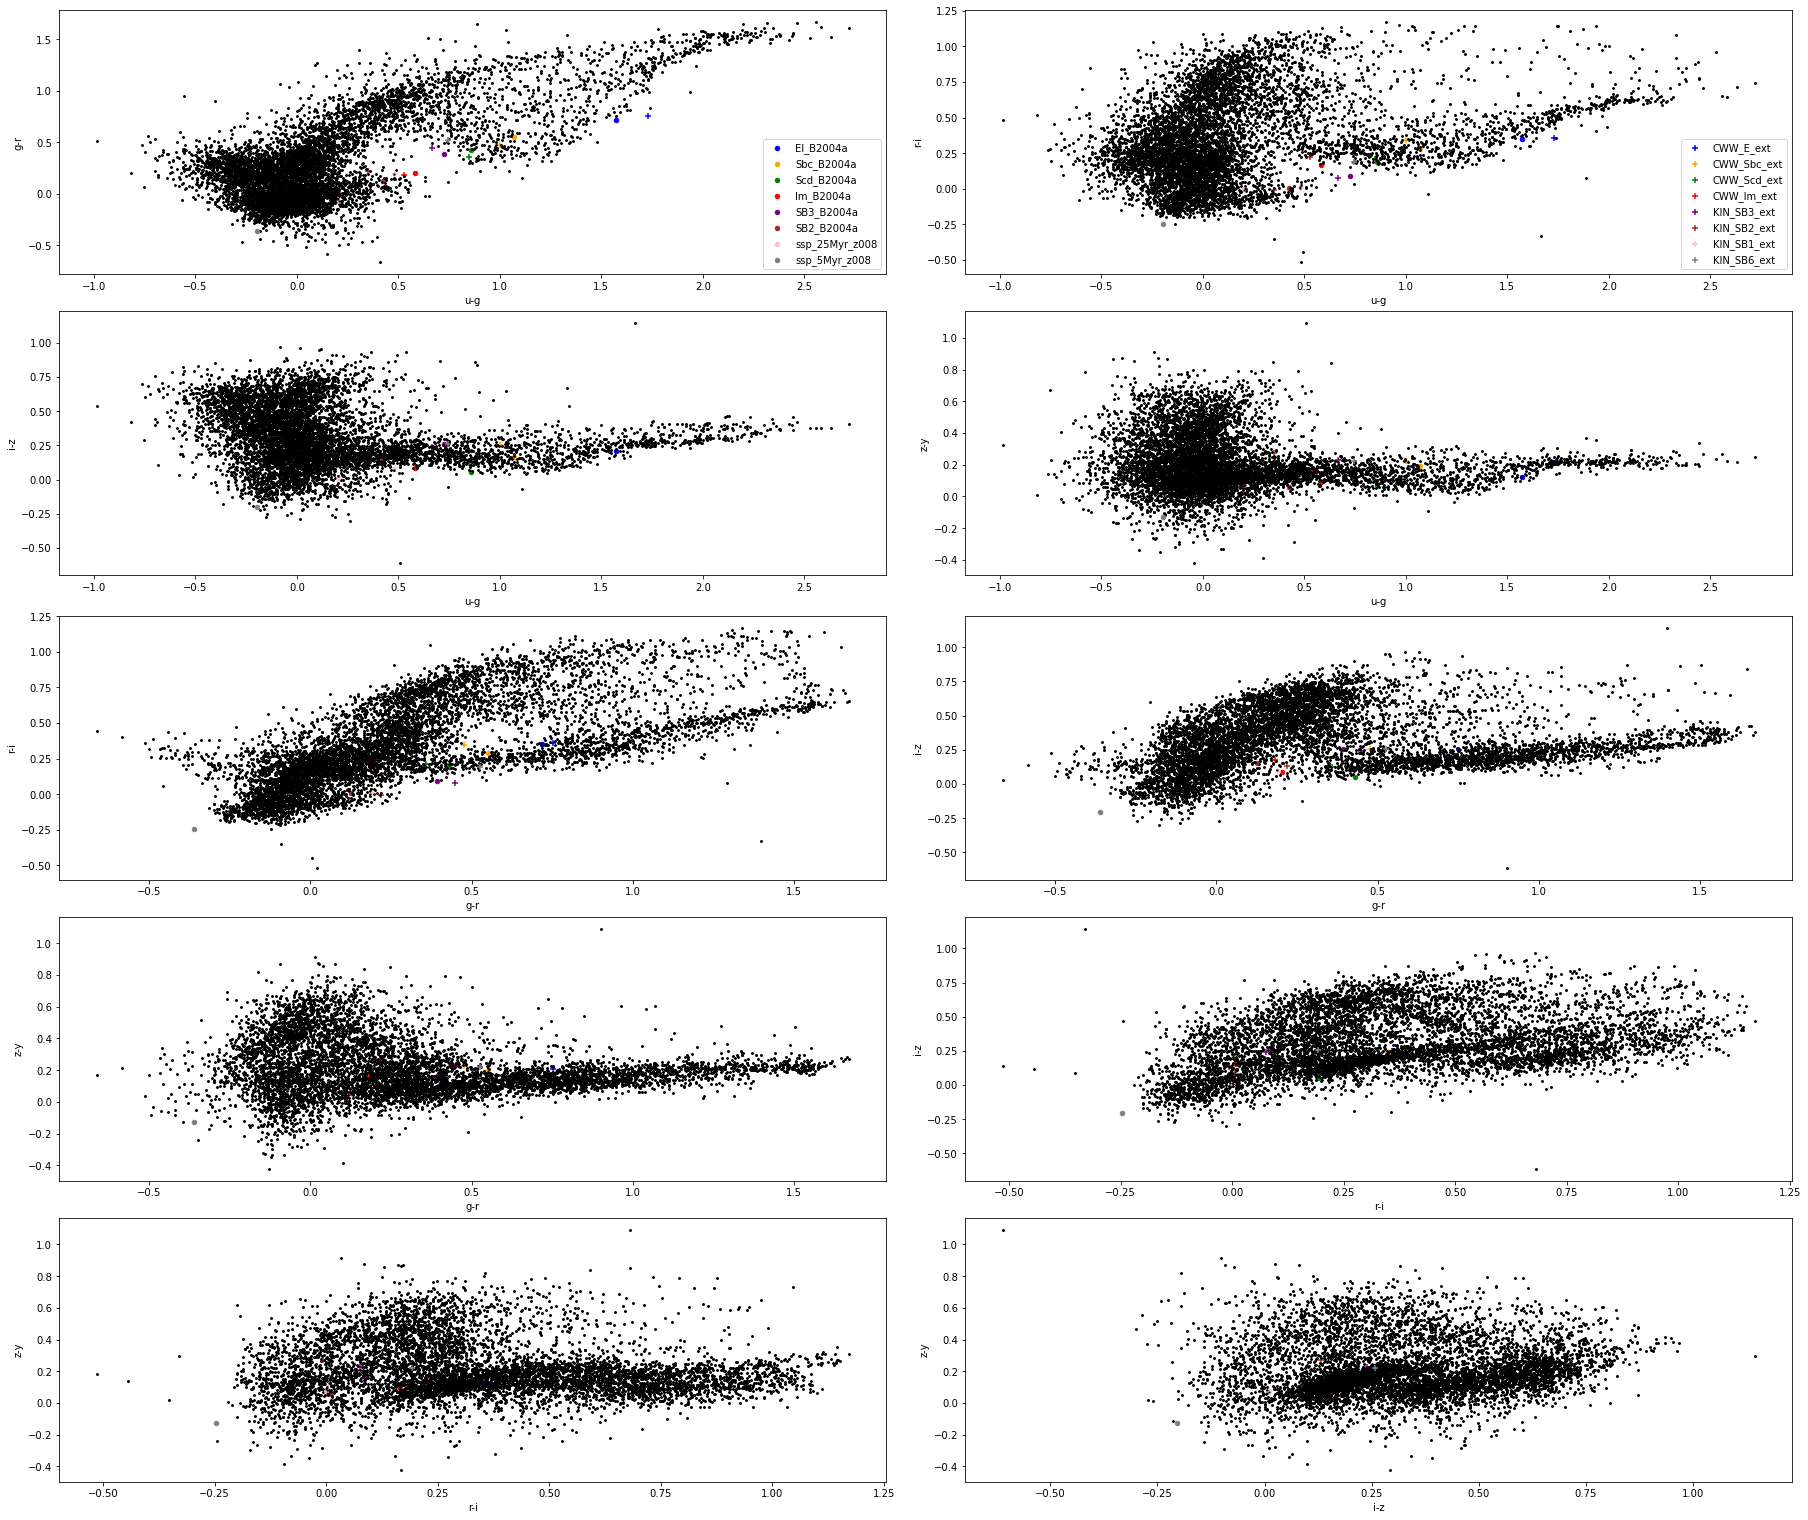

In [23]:
fig, axs = plt.subplots(5, 2, constrained_layout=True, figsize=(25, 21))
axs = axs.ravel()
loc=-1
sedNamesDelight = ['El_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'Im_B2004a', 'SB3_B2004a', 'SB2_B2004a', 'ssp_25Myr_z008', 'ssp_5Myr_z008']
sedNamesLePhare = ['CWW_E_ext', 'CWW_Sbc_ext', 'CWW_Scd_ext', 'CWW_Im_ext', 'KIN_SB3_ext', 'KIN_SB2_ext', 'KIN_SB1_ext', 'KIN_SB6_ext']
colorsNames= ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']
for indCol in np.arange(colorsDelight.shape[1]):
    for indPlot in np.arange(indCol+1, colorsDelight.shape[1]):
        loc+=1
        for indSed, c in zip(np.arange(colorsDelight.shape[0]), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
            if loc == 0:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k')
                axs[loc].scatter(colorsDelight[indSed, indCol], colorsDelight[indSed, indPlot], label=sedNamesDelight[indSed], s=20, c=c)
                axs[loc].scatter(colorsLePhare[indSed, indCol], colorsLePhare[indSed, indPlot], s=40, c=c, marker='+')
                axs[loc].legend()
            elif loc==1:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k')
                axs[loc].scatter(colorsDelight[indSed, indCol], colorsDelight[indSed, indPlot], s=20, c=c)
                axs[loc].scatter(colorsLePhare[indSed, indCol], colorsLePhare[indSed, indPlot], label=sedNamesLePhare[indSed], s=40, c=c, marker='+')
                axs[loc].legend()
            else:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k')
                axs[loc].scatter(colorsDelight[indSed, indCol], colorsDelight[indSed, indPlot], s=20, c=c)
                axs[loc].scatter(colorsLePhare[indSed, indCol], colorsLePhare[indSed, indPlot], label=sedNamesLePhare[indSed], s=40, c=c, marker='+')
            axs[loc].set_xlabel(colorsNames[indCol])
            axs[loc].set_ylabel(colorsNames[indPlot])

In [24]:
z_grid = np.linspace(0.01, 3.01, 100)
magTemplates, zTemplates, sedAndZTemplates = buildTemplates_tuples(sedList_Delight,\
                                                            z_grid,\
                                                            filtersList,\
                                                            output='magnitude')
colorsTemplates = np.empty((magTemplates.shape[0], magTemplates.shape[1]-1))
for col in np.arange(colorsTemplates.shape[1]):
    colorsTemplates[:, col] = magTemplates[:, col] - magTemplates[:, col+1]
colorsDerivCWW = np.empty((colorsTemplates.shape[0], colorsTemplates.shape[1]))
for ind in np.arange(colorsDerivCWW.shape[0]):
    if (ind>0) and (zTemplates[ind] > zTemplates[ind-1]):
        colorsDerivCWW[ind, :] = (colorsTemplates[ind, :] - colorsTemplates[ind-1, :]) / (zTemplates[ind] - zTemplates[ind-1])
    else:
        colorsDerivCWW[ind, :] = 0.0

In [25]:
print(sedAndZTemplates.shape, sedAndZTemplates[:10])

(800,) [(0, 0.01) (0, 0.040303030303030306) (0, 0.0706060606060606)
 (0, 0.1009090909090909) (0, 0.13121212121212122) (0, 0.16151515151515153)
 (0, 0.19181818181818183) (0, 0.22212121212121214)
 (0, 0.25242424242424244) (0, 0.2827272727272727)]


In [26]:
sedNumTemplates = []
for (tempNum, redshift) in sedAndZTemplates:
    sedNumTemplates.append(tempNum)
sedNumTemplates = np.array(sedNumTemplates)
print(sedNumTemplates[:10])
colorsTemplates = np.column_stack((colorsTemplates, sedNumTemplates))

[0 0 0 0 0 0 0 0 0 0]


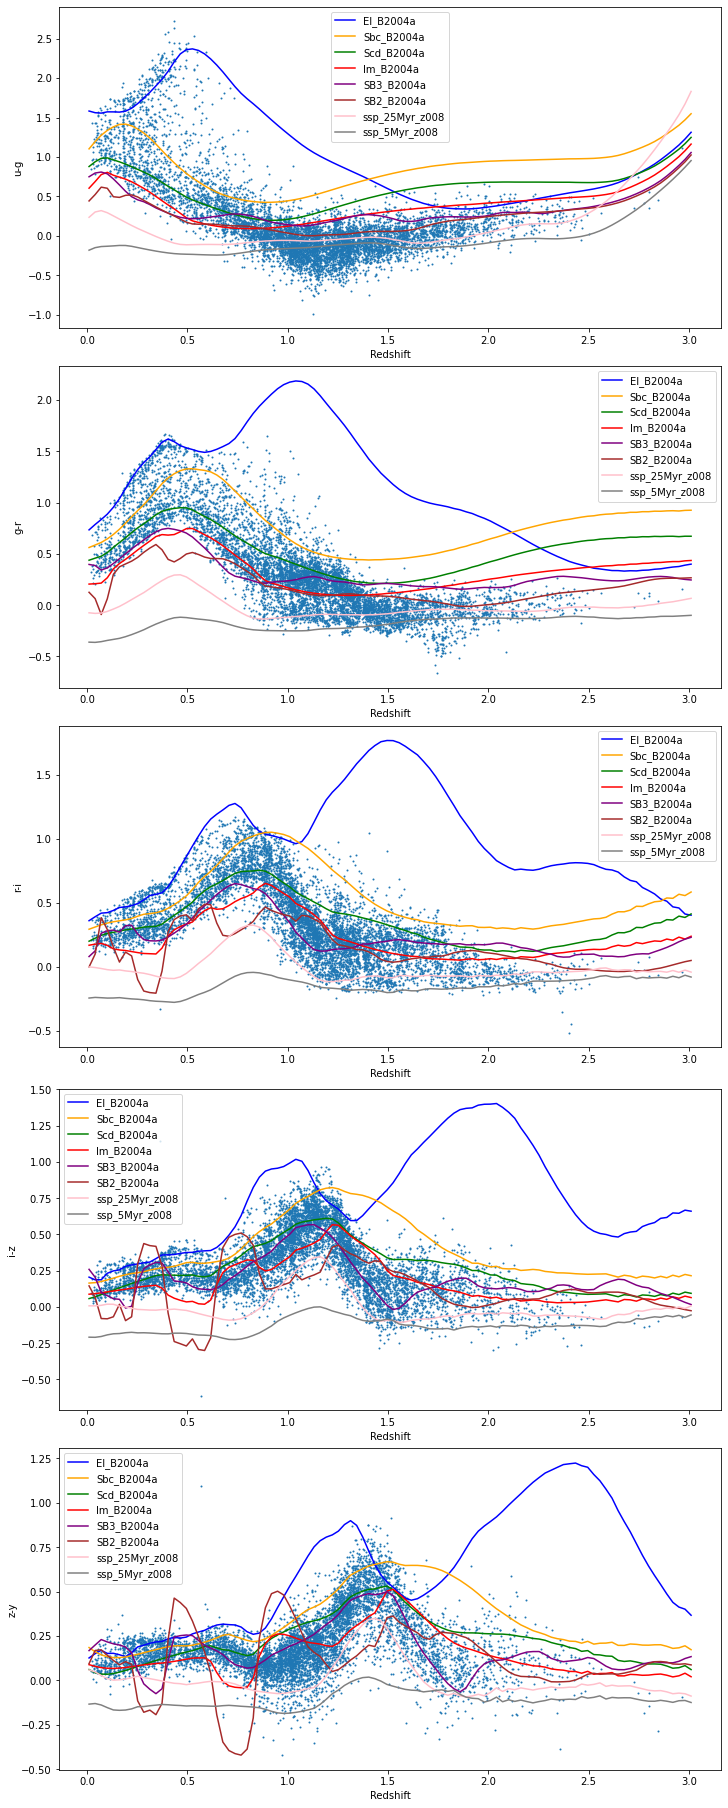

In [27]:
fig, axs = plt.subplots(allColors.shape[1], 1, constrained_layout=True, figsize=(10, 25))
axs = axs.ravel()

for color in np.arange(allColors.shape[1]):
    axs[color].scatter(z_clean, allColors[:, color], s=1)
    for sed, c in zip(np.arange(len(sedNamesDelight)), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
        ind = (colorsTemplates[:, -1] == sed)
        axs[color].plot(zTemplates[ind], colorsTemplates[ind, color], c=c, label=sedNamesDelight[sed])
    axs[color].set_xlabel('Redshift')
    axs[color].set_ylabel(colorsNames[color])
    axs[color].legend()

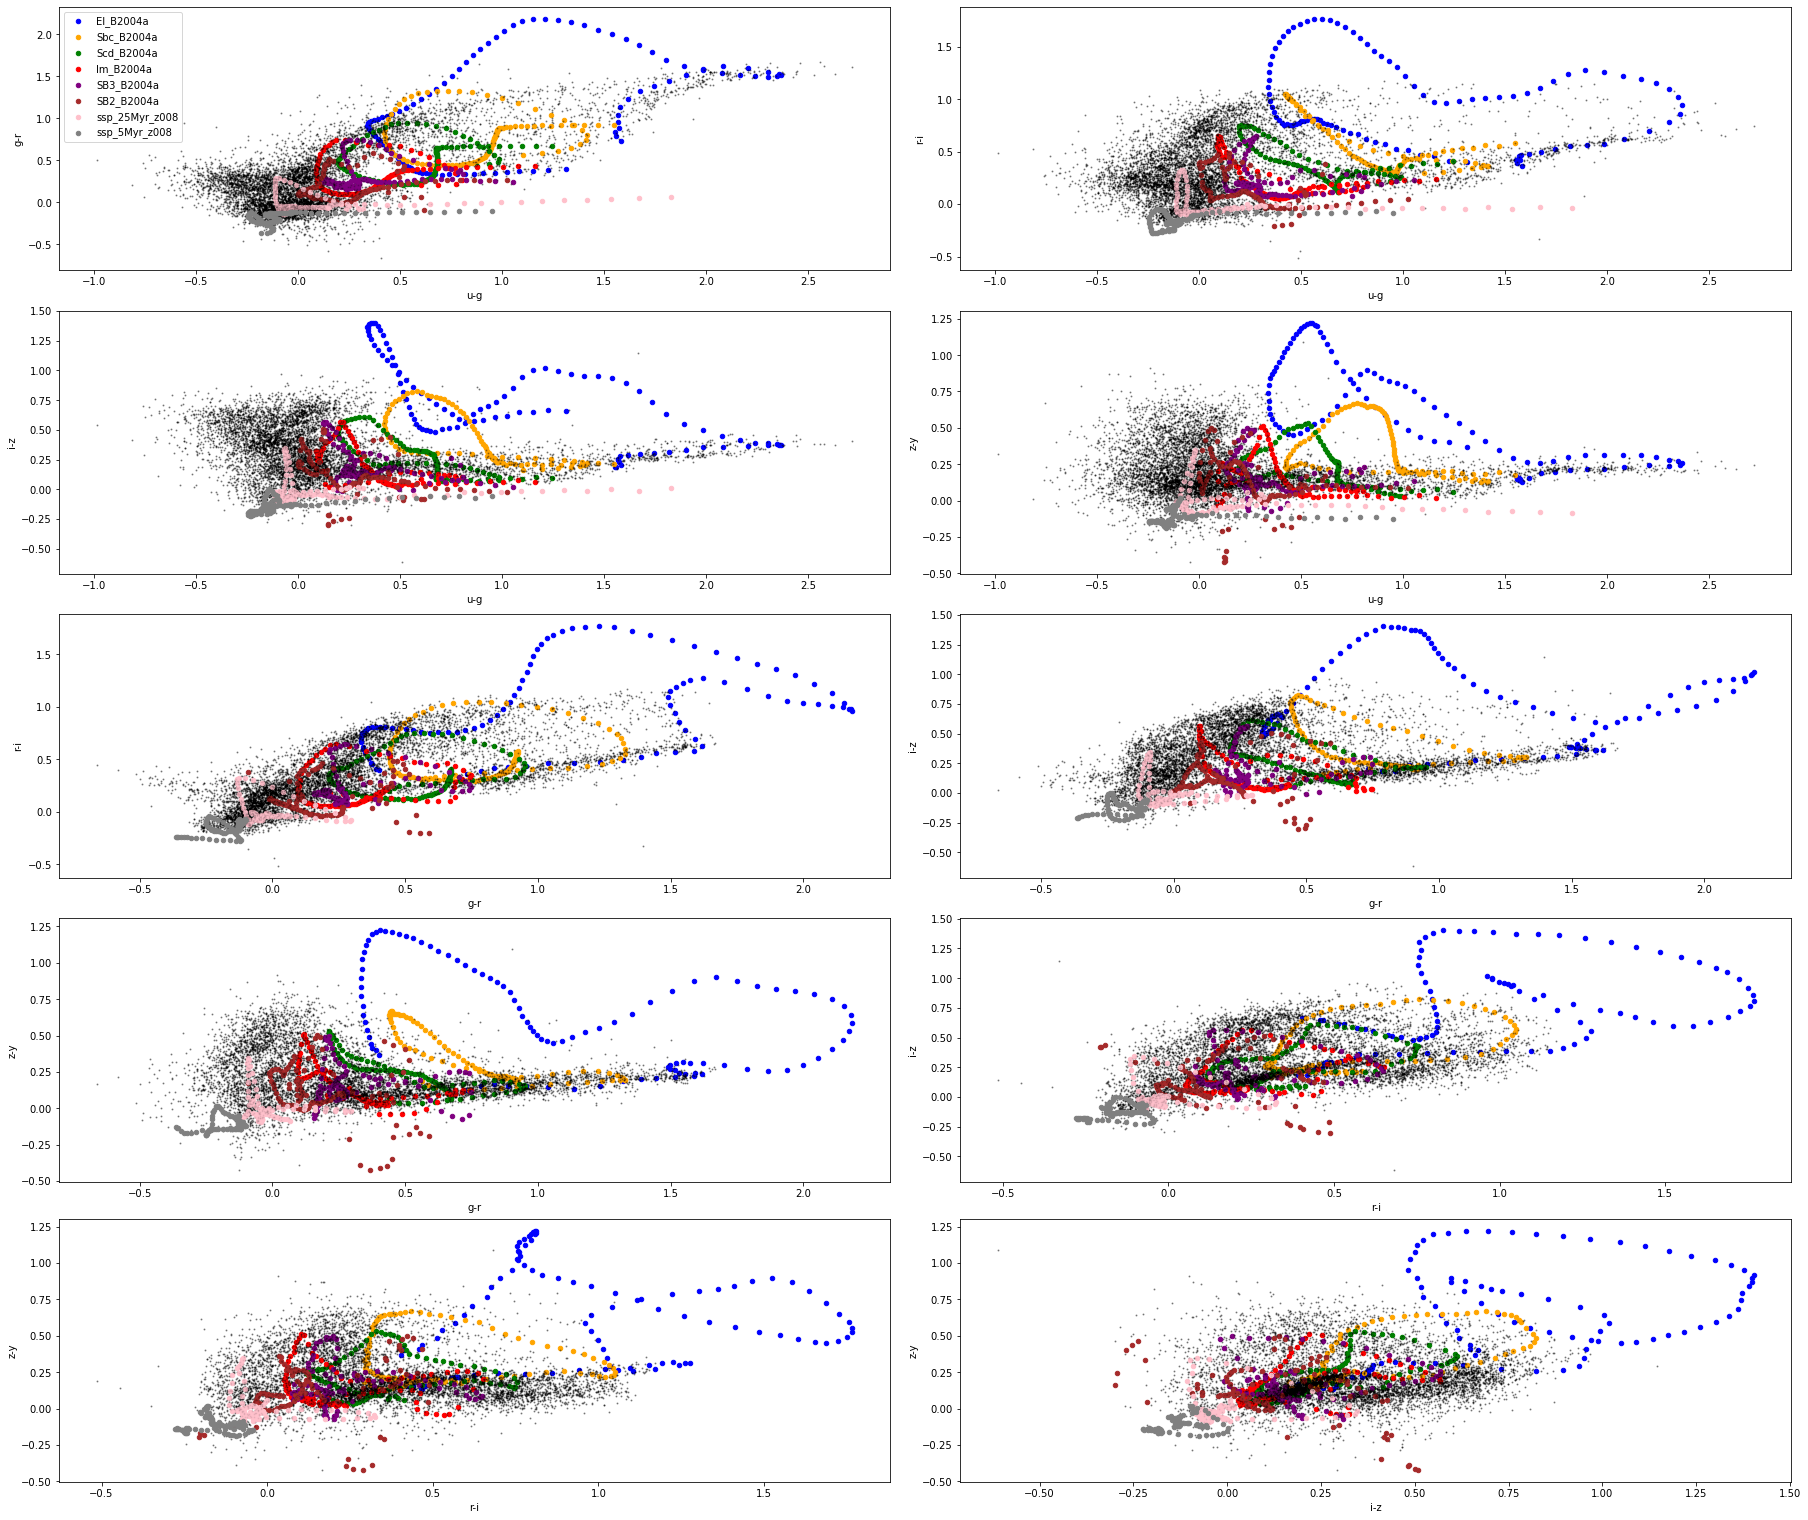

In [28]:
fig, axs = plt.subplots(5, 2, constrained_layout=True, figsize=(25, 21))
axs = axs.ravel()
loc=-1
sedNamesDelight = ['El_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'Im_B2004a', 'SB3_B2004a', 'SB2_B2004a', 'ssp_25Myr_z008', 'ssp_5Myr_z008']
colorsNames= ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']
for indCol in np.arange(colorsDelight.shape[1]):
    for indPlot in np.arange(indCol+1, colorsDelight.shape[1]):
        loc+=1
        for indSed, c in zip(np.arange(len(sedNamesDelight)), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
            ind = (colorsTemplates[:, -1] == indSed)
            if loc == 0:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k', alpha=0.05)
                axs[loc].scatter(colorsTemplates[ind, indCol], colorsTemplates[ind, indPlot], label=sedNamesDelight[indSed], s=20, c=c)
                axs[loc].legend()
            else:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k', alpha=0.05)
                axs[loc].scatter(colorsTemplates[ind, indCol], colorsTemplates[ind, indPlot], s=20, c=c)
            axs[loc].set_xlabel(colorsNames[indCol])
            axs[loc].set_ylabel(colorsNames[indPlot])

# With Brown SEDs

In [29]:
sedPath_Brown = os.path.realpath('./Delight/data/BROWN_SEDs')
print(sedPath_Brown)
sedList_Brown = [ os.path.join(sedPath_Brown, f) for f in os.listdir(sedPath_Brown) if (os.path.isfile(os.path.join(sedPath_Brown, f)) and not f == 'names.txt') ]
sedList_Brown = np.array(sedList_Brown)
print(sedList_Brown.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/Delight/data/BROWN_SEDs
(129,)


In [30]:
colorsBrown = sedColors(sedList_Brown, filtersList)
print(colorsBrown.shape)
print(colorsBrown[:10, :])

(129, 5)
[[1.52968143 0.72088919 0.35673715 0.19806153 0.18583936]
 [1.14454859 0.56642212 0.31217399 0.2122229  0.19932862]
 [1.27451573 0.66273109 0.34108952 0.2139742  0.20146327]
 [1.02568749 0.49715008 0.26429006 0.1552707  0.09378776]
 [1.17118303 0.62812513 0.2966101  0.17692864 0.17993061]
 [1.20858178 0.55702805 0.27872148 0.1396774  0.11255056]
 [0.75850807 0.30914388 0.16783374 0.17156791 0.09128896]
 [1.07532676 0.58889974 0.30273011 0.15706617 0.19304957]
 [1.02953878 0.5563273  0.28721536 0.23539362 0.23169082]
 [1.36110373 0.6723713  0.33655739 0.21428902 0.2188968 ]]


In [31]:
z_gridBrown = np.linspace(0.01, 3.01, 30)
magBrown, zBrown, sedAndZBrown = buildTemplates_tuples(sedList_Brown,\
                                                            z_gridBrown,\
                                                            filtersList,\
                                                            output='magnitude')
colorsTempBrown = np.empty((magBrown.shape[0], magBrown.shape[1]-1))
for col in np.arange(colorsTempBrown.shape[1]):
    colorsTempBrown[:, col] = magBrown[:, col] - magBrown[:, col+1]
colorsDerivBrown = np.empty((colorsTempBrown.shape[0], colorsTempBrown.shape[1]))
for ind in np.arange(colorsDerivBrown.shape[0]):
    if (ind>0) and (zBrown[ind] > zBrown[ind-1]):
        colorsDerivBrown[ind, :] = (colorsTempBrown[ind, :] - colorsTempBrown[ind-1, :]) / (zBrown[ind] - zBrown[ind-1])
    else:
        colorsDerivBrown[ind, :] = 0.0

In [32]:
print(sedAndZBrown.shape, sedAndZBrown[:10])

(3870,) [(0, 0.01) (0, 0.11344827586206896) (0, 0.21689655172413794)
 (0, 0.3203448275862069) (0, 0.42379310344827587) (0, 0.5272413793103449)
 (0, 0.6306896551724138) (0, 0.7341379310344828) (0, 0.8375862068965517)
 (0, 0.9410344827586207)]


In [33]:
sedNumBrown = []
for (tempNum, redshift) in sedAndZBrown:
    sedNumBrown.append(tempNum)
sedNumBrown = np.array(sedNumBrown)
print(sedNumBrown[:10])
colorsTempBrown = np.column_stack((colorsTempBrown, sedNumBrown))

[0 0 0 0 0 0 0 0 0 0]


In [34]:
sedNames_Brown = [ f.split('.')[0] for f in os.listdir(sedPath_Brown) if (os.path.isfile(os.path.join(sedPath_Brown, f)) and not f == 'names.txt') ]
sedNames_Brown = np.array(sedNames_Brown)
print(sedNames_Brown[:10])

['NGC_4450_spec' 'UGC_04881_spec' 'NGC_4569_spec' 'NGC_0855_spec'
 'III_Zw_035_spec' 'NGC_0628_spec' 'NGC_0337_spec' 'NGC_3198_spec'
 'UGC_08696_spec' 'Arp_118_spec']


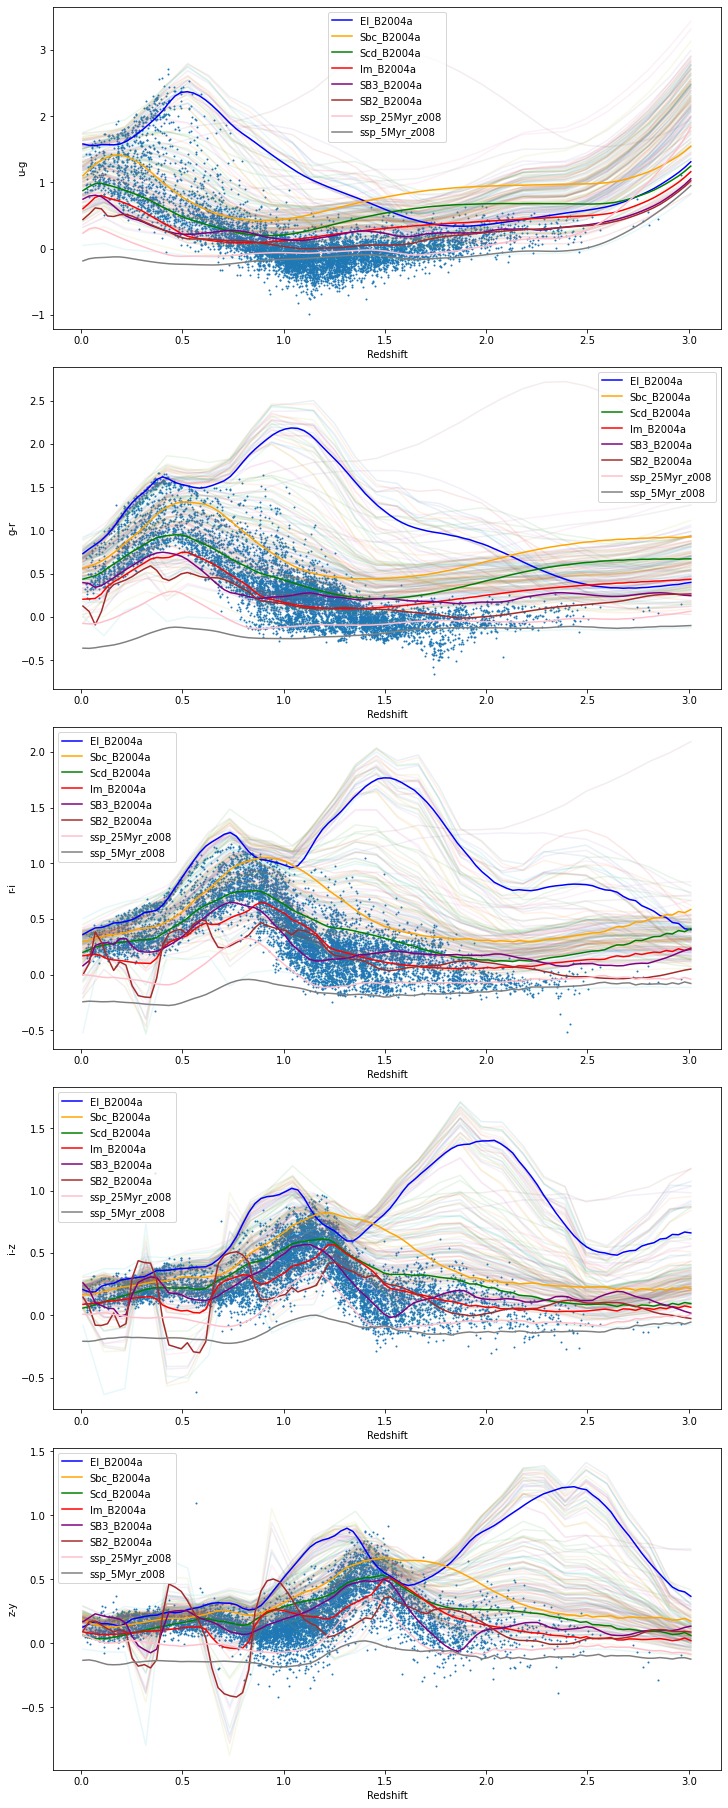

In [35]:
fig, axs = plt.subplots(allColors.shape[1], 1, constrained_layout=True, figsize=(10, 25))
axs = axs.ravel()

for color in np.arange(allColors.shape[1]):
    axs[color].scatter(z_clean, allColors[:, color], s=1)
    for sed in np.arange(len(sedNames_Brown)):
        ind = (colorsTempBrown[:, -1] == sed)
        axs[color].plot(zBrown[ind], colorsTempBrown[ind, color], alpha=0.1) #label=sedNames_Brown[sed], alpha=0.1)
    
    for sed, c in zip(np.arange(len(sedNamesDelight)), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
        ind = (colorsTemplates[:, -1] == sed)
        axs[color].plot(zTemplates[ind], colorsTemplates[ind, color], c=c, label=sedNamesDelight[sed])

    axs[color].set_xlabel('Redshift')
    axs[color].set_ylabel(colorsNames[color])
    axs[color].legend()

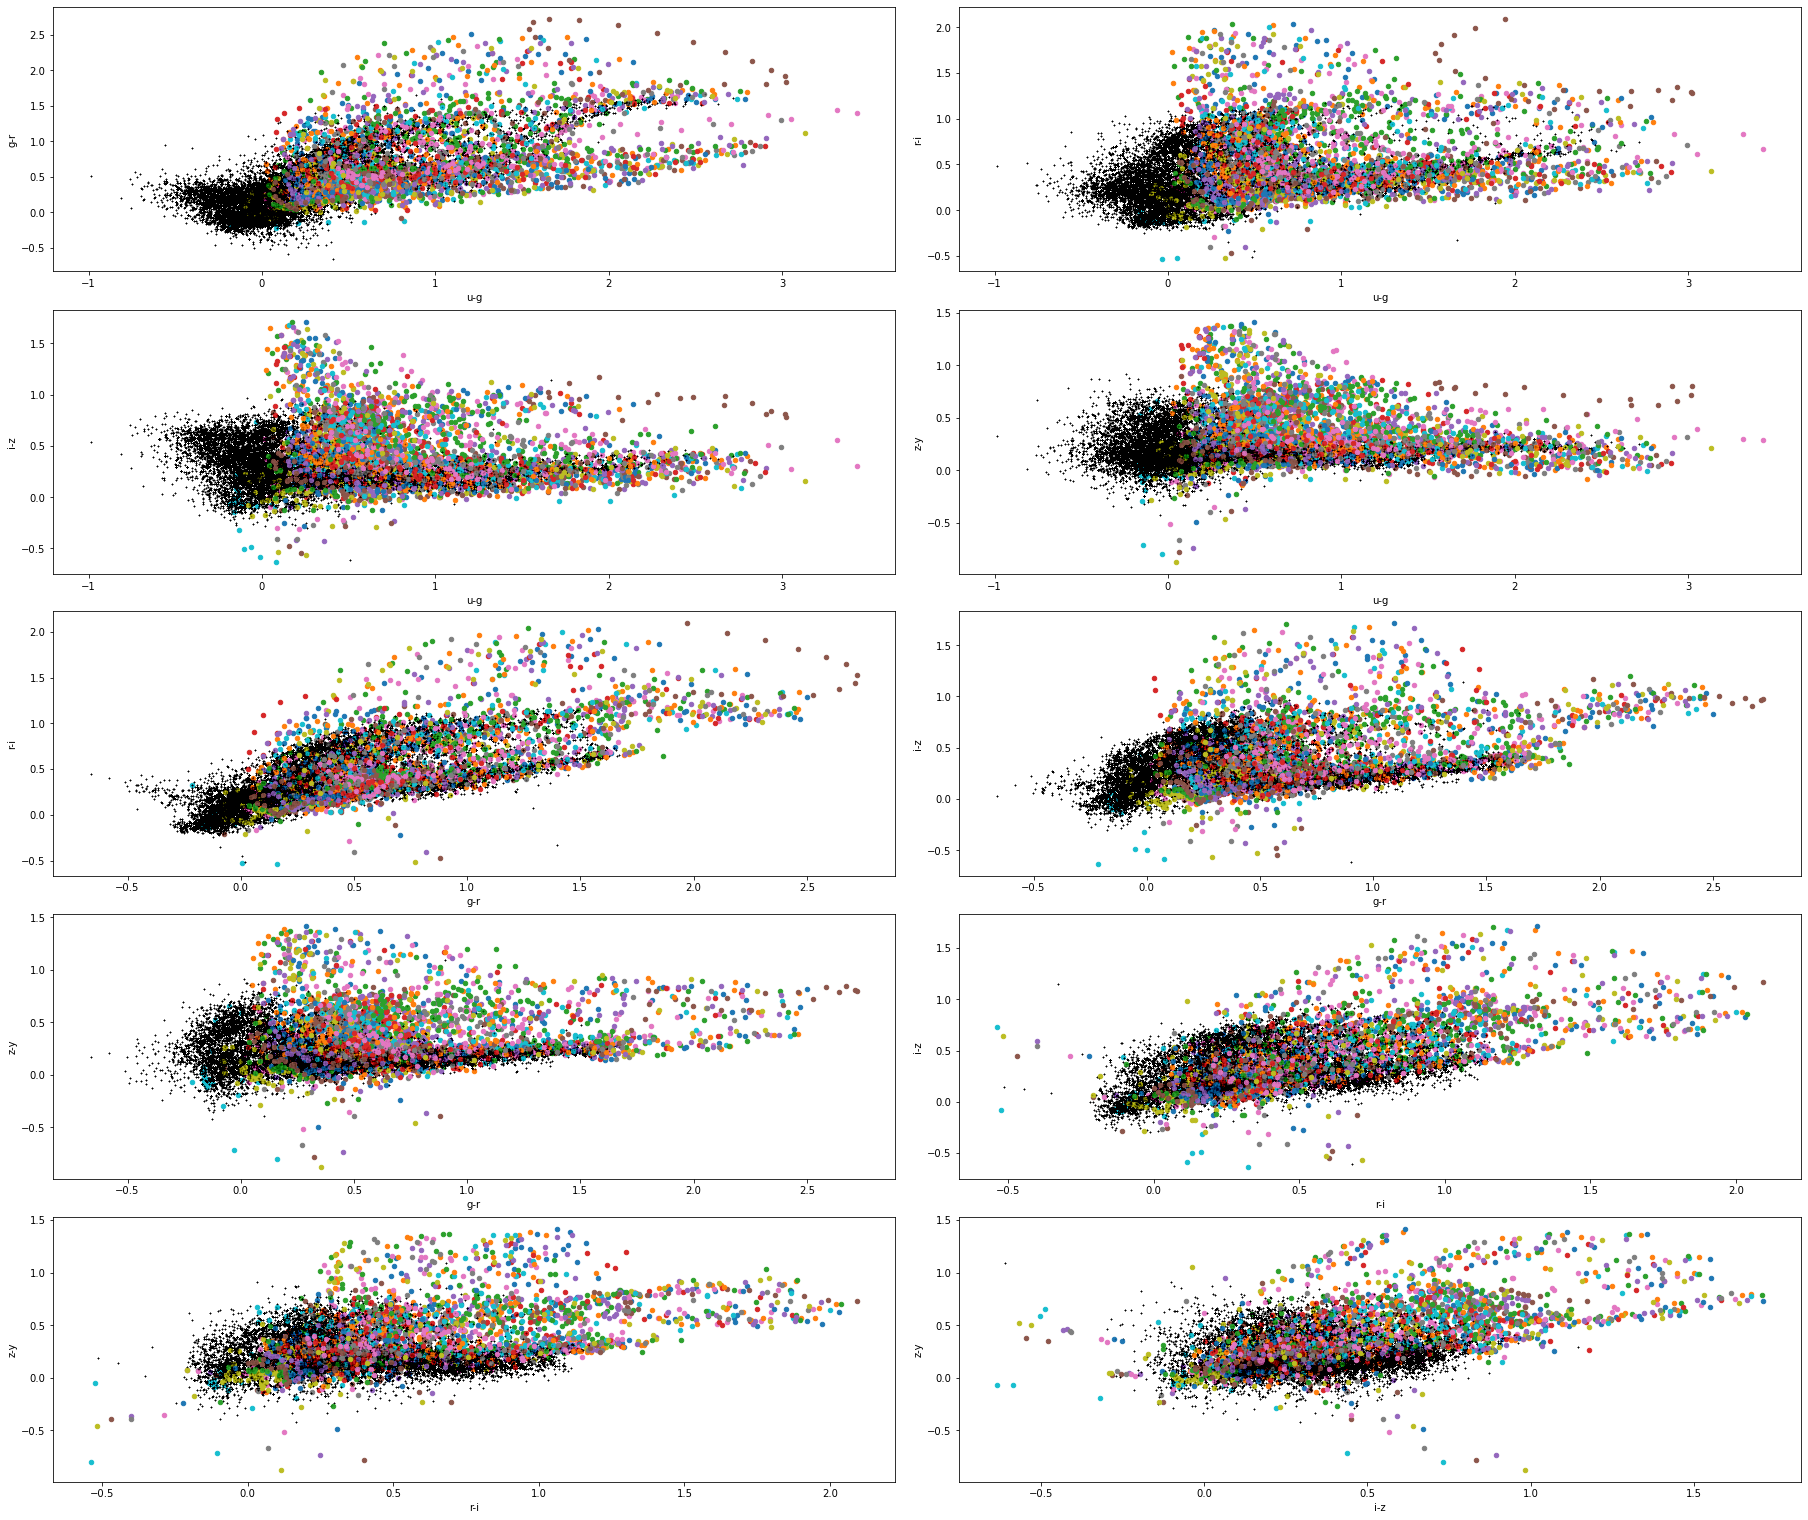

In [36]:
fig, axs = plt.subplots(5, 2, constrained_layout=True, figsize=(25, 21))
axs = axs.ravel()
loc=-1
colorsNames= ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']
for indCol in np.arange(colorsBrown.shape[1]):
    for indPlot in np.arange(indCol+1, colorsBrown.shape[1]):
        loc+=1
        for indSed in np.arange(len(sedNames_Brown)):
            ind = (colorsTempBrown[:, -1] == indSed)
            if loc == 0:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k', alpha=0.01)
                axs[loc].scatter(colorsTempBrown[ind, indCol], colorsTempBrown[ind, indPlot], label=sedNames_Brown[indSed], s=20)
                #axs[loc].legend()
            else:
                axs[loc].scatter(allColors[:, indCol], allColors[:, indPlot], s=1, c='k', alpha=0.01)
                axs[loc].scatter(colorsTempBrown[ind, indCol], colorsTempBrown[ind, indPlot], s=20)
            axs[loc].set_xlabel(colorsNames[indCol])
            axs[loc].set_ylabel(colorsNames[indPlot])

## Classif of Brown data on CWW SEDs

### Colors only - not shifted. Nonsensical IMO

In [37]:
# Random forest routine from scikit-learn:
from sklearn.ensemble import RandomForestClassifier
nb_est, depth = 50, 30
clasf = RandomForestClassifier(n_estimators = nb_est, max_depth = depth, max_features = 'auto')
clasf.fit(colorsDelight, np.arange(len(sedNamesDelight)))
typesInd_Brown=clasf.predict(colorsBrown)
print(typesInd_Brown)
types_Brown=[sedNamesDelight[x] for x in typesInd_Brown]
print(types_Brown)

[0 1 0 1 1 1 3 1 1 0 1 0 0 4 0 1 2 0 0 7 3 3 0 3 3 5 0 1 1 2 4 0 0 1 1 3 0
 1 0 0 0 0 1 1 0 2 0 1 0 1 0 0 0 1 5 3 1 6 4 0 4 0 0 0 3 0 1 0 3 1 2 2 1 0
 1 6 0 1 4 2 0 1 0 1 3 0 6 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 4 0 5 0 2
 1 0 1 0 0 0 1 6 0 3 0 3 1 3 3 1 0 0]
['El_B2004a', 'Sbc_B2004a', 'El_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'Im_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'El_B2004a', 'Sbc_B2004a', 'El_B2004a', 'El_B2004a', 'SB3_B2004a', 'El_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'El_B2004a', 'El_B2004a', 'ssp_5Myr_z008', 'Im_B2004a', 'Im_B2004a', 'El_B2004a', 'Im_B2004a', 'Im_B2004a', 'SB2_B2004a', 'El_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'SB3_B2004a', 'El_B2004a', 'El_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'Im_B2004a', 'El_B2004a', 'Sbc_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'Sbc_B2004a', 'Sbc_B2004a', 'El_B2004a', 'Scd_B2004a', 'El_B2004a', 'Sbc_B2004a', 'El_B2004a', 'Sbc_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'Sbc_B2004a', 'SB2_B

(array([0.43410853, 0.29457364, 0.05426357, 0.10852713, 0.04651163,
        0.02325581, 0.03100775, 0.00775194]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

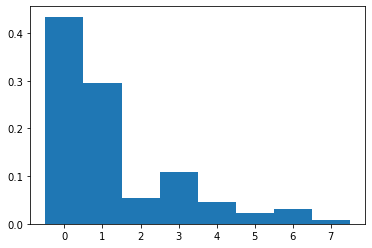

In [38]:
plt.hist(typesInd_Brown, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], density=True)

### Color-redshift model

In [39]:
clasf.fit(colorsTemplates[:, :-1], colorsTemplates[:, -1])
typesInd_Brown=clasf.predict(colorsTempBrown[:, :-1])
typesInd_Brown=np.array([int(x) for x in typesInd_Brown], dtype=int)
types_Brown=[sedNamesDelight[x] for x in typesInd_Brown]
print(types_Brown[:10])

['Sbc_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a']


(array([0.34599483, 0.27338501, 0.18010336, 0.05193798, 0.0875969 ,
        0.04702842, 0.00930233, 0.00465116]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

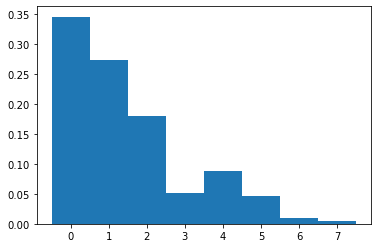

In [40]:
plt.hist(typesInd_Brown, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], density=True)

#### Verification attempt

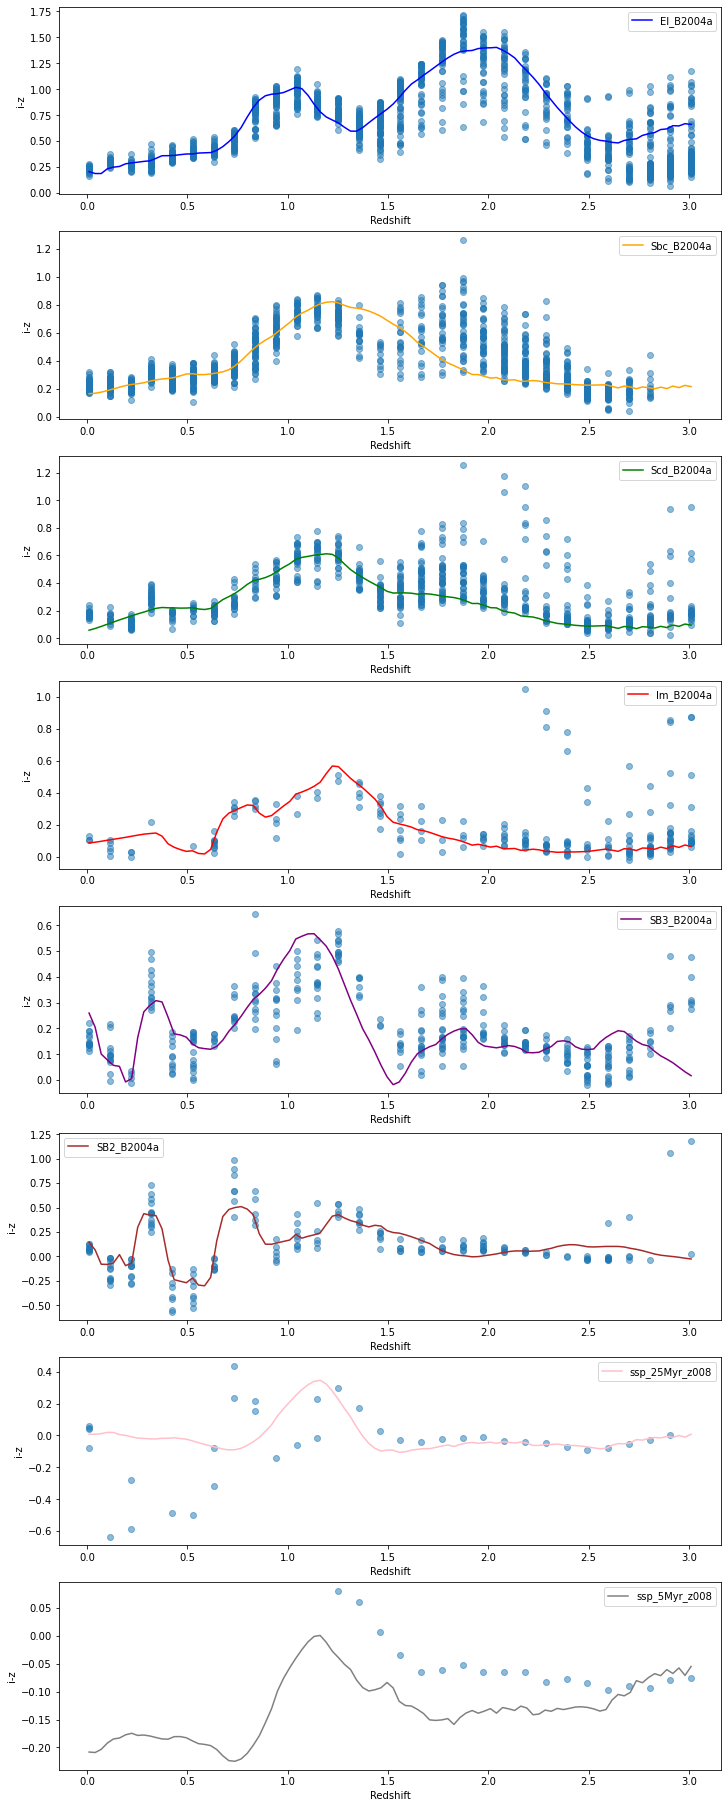

In [41]:
fig, axs = plt.subplots(len(sedNamesDelight), 1, constrained_layout=True, figsize=(10, 25))
axs = axs.ravel()
color = 3
for sed, c in zip(np.arange(len(sedNamesDelight)), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
    ind = (typesInd_Brown == sed)
    axs[sed].scatter(zBrown[ind], colorsTempBrown[ind, color], alpha=0.5) #label=sedNames_Brown[sed], alpha=0.1)
    ind = (colorsTemplates[:, -1] == sed)
    axs[sed].plot(zTemplates[ind], colorsTemplates[ind, color], c=c, label=sedNamesDelight[sed])

    axs[sed].set_xlabel('Redshift')
    axs[sed].set_ylabel(colorsNames[color])
    axs[sed].legend()

### Idea : add d(color)/dz in the features for ML

In [42]:
colorsTemplatesDiff = np.empty( (colorsTemplates.shape[0]-1, colorsTemplates.shape[1]-1) )
for ind in np.arange(colorsTemplatesDiff.shape[0]):
    colorsTemplatesDiff[ind, :] = (colorsTemplates[ind+1, :-1] - colorsTemplates[ind, :-1]) / (zTemplates[ind+1] - zTemplates[ind])

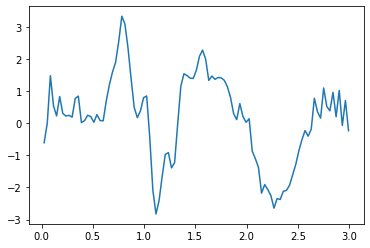

In [43]:
zMed = [ 0.5*(zTemplates[ind+1] + zTemplates[ind]) for ind in np.arange(len(zTemplates)-1) ]
plt.plot(zMed[:99], colorsTemplatesDiff[:99, 3])

In [44]:
z_gridBrown = np.linspace(0.01, 3.01, 30)
magBrown, zBrown, sedAndZBrown = buildTemplates_indices(sedList_Brown,\
                                                            z_gridBrown,\
                                                            filtersList,\
                                                            output='magnitude')
colorsTempBrown = np.empty((magBrown.shape[0], magBrown.shape[1]-1))
for col in np.arange(colorsTempBrown.shape[1]):
    colorsTempBrown[:, col] = magBrown[:, col] - magBrown[:, col+1]
colorsDerivBrown = np.empty((colorsTempBrown.shape[0], colorsTempBrown.shape[1]))
for ind in np.arange(colorsDerivBrown.shape[0]):
    if (ind>0) and (zBrown[ind] > zBrown[ind-1]):
        colorsDerivBrown[ind, :] = (colorsTempBrown[ind, :] - colorsTempBrown[ind-1, :]) / (zBrown[ind] - zBrown[ind-1])
    else:
        colorsDerivBrown[ind, :] = 0.0

In [45]:
z_grid = np.linspace(0.01, 3.01, 100)
magTemplates, zTemplates, sedAndZTemplates = buildTemplates_indices(sedList_Delight,\
                                                            z_grid,\
                                                            filtersList,\
                                                            output='magnitude')
colorsTemplates = np.empty((magTemplates.shape[0], magTemplates.shape[1]-1))
for col in np.arange(colorsTemplates.shape[1]):
    colorsTemplates[:, col] = magTemplates[:, col] - magTemplates[:, col+1]
colorsDerivCWW = np.empty((colorsTemplates.shape[0], colorsTemplates.shape[1]))
for ind in np.arange(colorsDerivCWW.shape[0]):
    if (ind>0) and (zTemplates[ind] > zTemplates[ind-1]):
        colorsDerivCWW[ind, :] = (colorsTemplates[ind, :] - colorsTemplates[ind-1, :]) / (zTemplates[ind] - zTemplates[ind-1])
    else:
        colorsDerivCWW[ind, :] = 0.0

In [46]:
trainData = np.column_stack((colorsTemplates, colorsDerivCWW))
testData = np.column_stack((colorsTempBrown, colorsDerivBrown))

In [47]:
clasf.fit(trainData, sedAndZTemplates)
typesInd_Brown=clasf.predict(testData)
types_Brown=[sedNamesDelight[x] for x in typesInd_Brown]
print(types_Brown[:10])

['Sbc_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a', 'El_B2004a']


(array([0.35813953, 0.27338501, 0.16795866, 0.05813953, 0.0870801 ,
        0.04082687, 0.00904393, 0.00542636]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

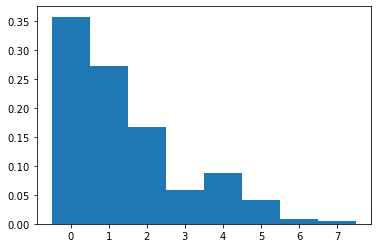

In [48]:
plt.hist(typesInd_Brown, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], density=True)

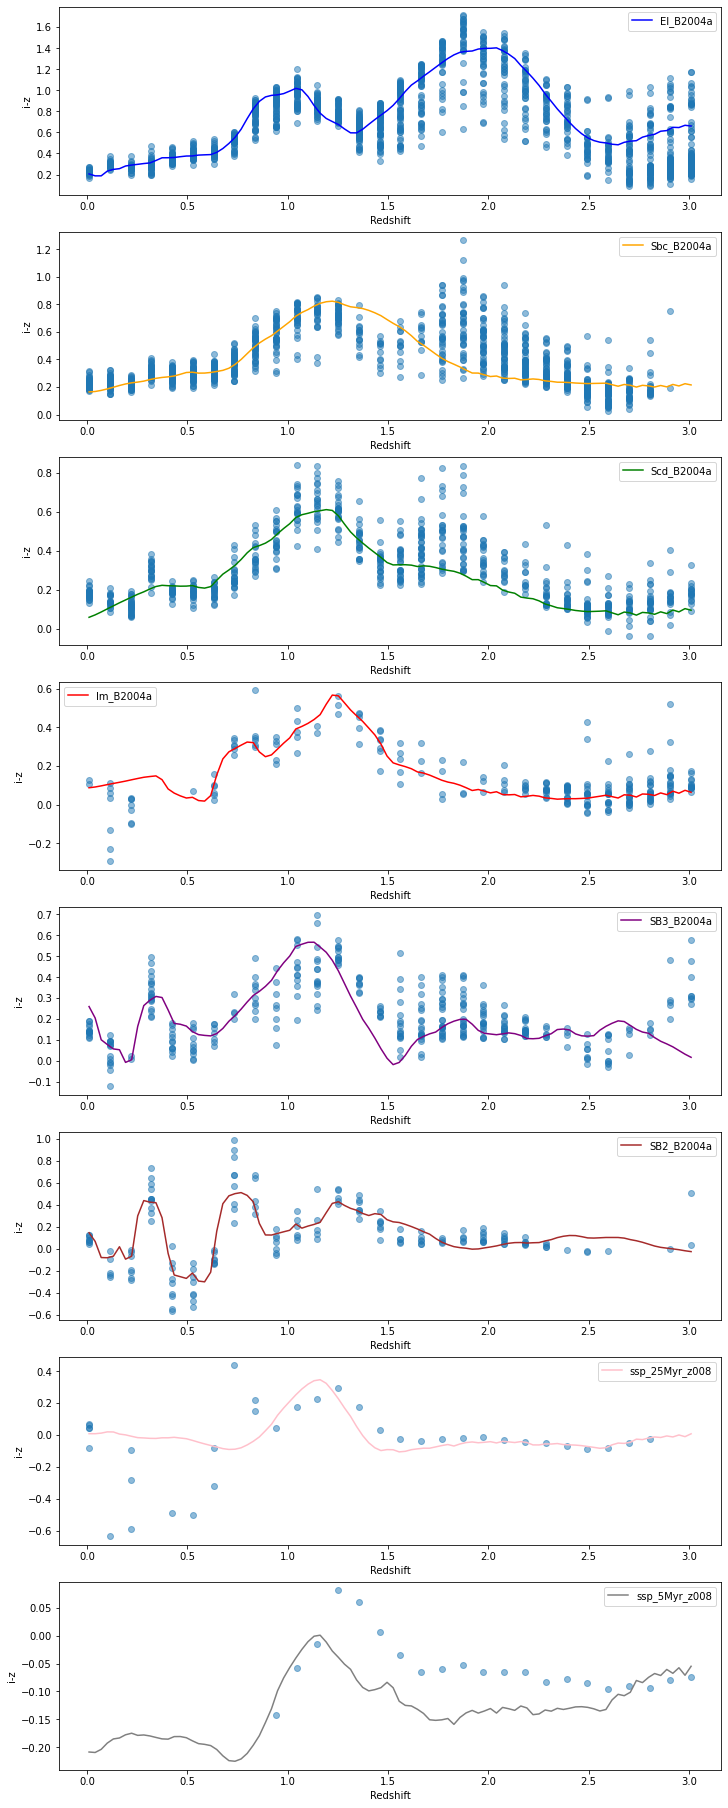

In [49]:
fig, axs = plt.subplots(len(sedNamesDelight), 1, constrained_layout=True, figsize=(10, 25))
axs = axs.ravel()
color = 3
for sed, c in zip(np.arange(len(sedNamesDelight)), ['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'grey']):
    ind = (typesInd_Brown == sed)
    axs[sed].scatter(zBrown[ind], colorsTempBrown[ind, color], alpha=0.5) #label=sedNames_Brown[sed], alpha=0.1)
    ind = (sedAndZTemplates[:] == sed)
    axs[sed].plot(zTemplates[ind], colorsTemplates[ind, color], c=c, label=sedNamesDelight[sed])

    axs[sed].set_xlabel('Redshift')
    axs[sed].set_ylabel(colorsNames[color])
    axs[sed].legend()

In [50]:
np.savetxt('colorsTempBrown.txt', colorsTempBrown)
#np.savetxt('sedNamesBrown.txt', sedNames_Brown)
np.savetxt('magBrown.txt', magBrown)
np.savetxt('zBrown.txt', zBrown)
np.savetxt('sedAndZBrown.txt', sedAndZBrown)